### Title: To show how keras and tensorflow works

In [1]:
# Importing libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_mldata (deprecated)
from sklearn.datasets import fetch_openml  # Using this instead of above.
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Reading data
mnist = fetch_openml('mnist_784')

In [3]:
# Transforming data
inputData, y = mnist['data'], mnist['target']

In [4]:
# As inputdata contains the colorful images.
# Each pixel are aranged in the form of array from 0 to 255.
# To convert in gray form just divide by 255.
inputData = inputData/255
nDigits = 10   # 0 - 9 = 10.

In [5]:
y = y.astype('float32')
y.shape

(70000,)

In [6]:
# Chnaging y to a sparse matrix.
y_sparse = np.zeros([y.shape[0], nDigits])
for i in range(y.shape[0]):
    y_sparse[i, y[i].astype(int)] = 1
y = y_sparse

In [7]:
# New y as sparse matrix.
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
# Spliting dataset into train and test.
train_size = 60000
test_size = y.shape[0] - train_size

In [9]:
# Spliting y
y_train, y_test = y[:train_size, :].reshape(train_size, nDigits), y[train_size:, :].reshape(test_size, nDigits)

In [10]:
# Spliting inputData
inputData_train, inputData_test = inputData[:train_size, :], inputData[train_size:, :]

In [11]:
# To have random variable to our Neural Network.
np.random.seed(1004)

In [12]:
y[0:2, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

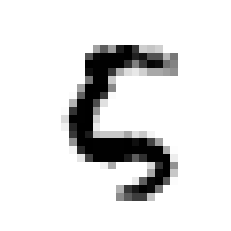

Digit: 5


In [13]:
# Display some of the digit
i = 2000
plt.imshow(inputData_train[i, :].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
# print('Digit:', (list(y[i])).index(1))
print('Digit:', np.argmax(y[i]))

In [14]:
# Defining activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(z):   # Here z is sigmoid function at a specific value.
    return z/(1-z)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1)
    
def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [15]:
# Defining values.
inputDim = inputData_train.shape[1]
nHidden = 64    # Number of nodes in hidden layer 1
learning_rate = 1  
weight_decay = 0.001    # It is the constant for L2 regularization

In [16]:
W1 = 0.01*np.random.randn(nHidden, inputDim)   # Weights for hidden layer 1
b1 = np.zeros((nHidden, 1))   
W2 = 0.01*np.random.randn(nDigits, nHidden)    #Weights for Output layer
b2 = np.zeros((nDigits, 1))

# NOTE: 
# 1) We're considering normal distribution so as to get the values about the origin.
# 2) Multiplying by 0.01 so as to restrict the large number.

In [17]:
# Setting the data
inputData = inputData_train
y = y_train

#Epoch 0, cost = 2.3026412975993007
#Epoch 10, cost = 1.2906035116639847
#Epoch 20, cost = 1.4004882210243816
#Epoch 30, cost = 1.0038241152800016
#Epoch 40, cost = 0.7400932435549599
#Epoch 50, cost = 0.47694464545605664
#Epoch 60, cost = 0.5020383496590376
#Epoch 70, cost = 0.33371321031948387
#Epoch 80, cost = 0.31498377857822446
#Epoch 90, cost = 0.39691041189360876


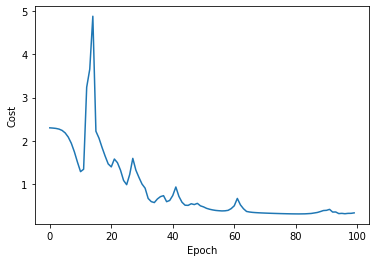

In [18]:
nEpoch = 100  # Number of times will train data.
costPlot = np.zeros(nEpoch)

for i in range(nEpoch):
    # Forward Pass
    Z1 = np.matmul(W1, inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Back Propagation using Chain rule in derivatives.
    dZ2 = CE_Softmax_Derivative(A2, y.T)
    dW2 = (1/train_size) * np.matmul(dZ2, A1.T)  # Divided by m -> To get the average of all the samples.
    db2 = (1/train_size) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/train_size) * np.matmul(dZ1, inputData)
    db1 = (1/train_size) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2 + weight_decay * W2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1 + weight_decay * W1
    b1 = b1 - learning_rate * db1
    
    if i % 10 == 0:
        print(f'#Epoch {i}, cost = {cost}')
        
plt.plot(costPlot)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [19]:
# Using value of W and b that are obtained to test the data.

Z1 = np.matmul(W1, inputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

pred = np.argmax(Z2, axis=0)
label = np.argmax(y_test.T, axis=0)

In [20]:
# Printing Confusion matix and classification report.
print(confusion_matrix(pred, label))
print(classification_report(pred, label))

[[ 953    0   12    6    1   13   17    3    5    8]
 [   0 1091    1    1    1    3    2    9    5    4]
 [   1    2  897   30    3    0    3   31    1    2]
 [   0    1    3  708    0    7    0    0    3    1]
 [   0    1   18    0  923   10   11   10    5   43]
 [   7    1    3  145    1  785   23    0   16   18]
 [   8    4   16    2   11   15  893    0    9    0]
 [   2    1   11   16    0    3    1  923    3   15]
 [   9   34   69   96   11   50    8   10  922   28]
 [   0    0    2    6   31    6    0   42    5  890]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1018
           1       0.96      0.98      0.97      1117
           2       0.87      0.92      0.90       970
           3       0.70      0.98      0.82       723
           4       0.94      0.90      0.92      1021
           5       0.88      0.79      0.83       999
           6       0.93      0.93      0.93       958
           7       0.90      0.95   

#Epoch 0, cost = 0.3436708205476808
#Epoch 10, cost = 0.2846936367666478
#Epoch 20, cost = 0.28173418144067197
#Epoch 30, cost = 0.2798745653030459
#Epoch 40, cost = 0.27821029346987536
#Epoch 50, cost = 0.27668709802204366
#Epoch 60, cost = 0.275278073337162
#Epoch 70, cost = 0.27396082500223157
#Epoch 80, cost = 0.27272637898663493
#Epoch 90, cost = 0.2715643351760122


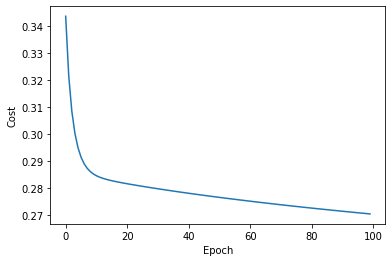

In [21]:
# Let's check for decreasing value of learning rate.
learning_rate = 0.1
nEpoch = 100  # Number of times will train data.
costPlot = np.zeros(nEpoch)

for i in range(nEpoch):
    # Forward Pass
    Z1 = np.matmul(W1, inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Back Propagation using Chain rule in derivatives.
    dZ2 = CE_Softmax_Derivative(A2, y.T)
    dW2 = (1/train_size) * np.matmul(dZ2, A1.T)  # Divided by m -> To get the average of all the samples.
    db2 = (1/train_size) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/train_size) * np.matmul(dZ1, inputData)
    db1 = (1/train_size) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2 + weight_decay * W2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1 + weight_decay * W1
    b1 = b1 - learning_rate * db1
    
    if i % 10 == 0:
        print(f'#Epoch {i}, cost = {cost}')
        
plt.plot(costPlot)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [22]:
# Now, again using value of W and b that are obtained to test the data.

Z1 = np.matmul(W1, inputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

pred = np.argmax(Z2, axis=0)
label = np.argmax(y_test.T, axis=0)

In [23]:
# Printing Confusion matix and classification report.
print(confusion_matrix(pred, label))
print(classification_report(pred, label))

[[ 957    0   12    1    1   14   15    2    4   10]
 [   0 1105    1    1    0    2    3    8    8    6]
 [   4    2  921   18    5    6    5   29    8    2]
 [   2    5   20  932    0   35    0    2   21    9]
 [   0    1   15    0  915   10    8    6    6   31]
 [   5    1    0   28    1  769   17    0   15   13]
 [   7    3   17    2   11   12  904    0   12    0]
 [   2    1   15   12    4    5    3  959    6   28]
 [   3   17   29   12    6   29    3    3  885   13]
 [   0    0    2    4   39   10    0   19    9  897]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1016
           1       0.97      0.97      0.97      1134
           2       0.89      0.92      0.91      1000
           3       0.92      0.91      0.92      1026
           4       0.93      0.92      0.93       992
           5       0.86      0.91      0.88       849
           6       0.94      0.93      0.94       968
           7       0.93      0.93   

#Epoch 0, cost = 2.3022033691302073
#Epoch 10, cost = 1.1112221507677986
#Epoch 20, cost = 0.9821819095295228
#Epoch 30, cost = 0.616034100826415
#Epoch 40, cost = 0.47845769726851056
#Epoch 50, cost = 0.39930205239109345
#Epoch 60, cost = 0.3240805140248951
#Epoch 70, cost = 0.313551482541831
#Epoch 80, cost = 0.2685284000276954
#Epoch 90, cost = 0.25138787582671157
#Epoch 100, cost = 0.23721056021400144
#Epoch 110, cost = 0.22494284058773897
#Epoch 120, cost = 0.21406610907681153
#Epoch 130, cost = 0.20432967203979363
#Epoch 140, cost = 0.19562236351247309
#Epoch 150, cost = 0.18778354018048643
#Epoch 160, cost = 0.1806086416431095
#Epoch 170, cost = 0.17401006855259624
#Epoch 180, cost = 0.16793621909337736
#Epoch 190, cost = 0.16231170149535723


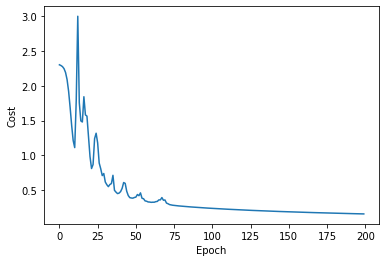

In [24]:
# Now increasing hidden layers (64 to 128) with same learning rate.
# Defining values.
inputDim = inputData_train.shape[1]
nHidden = 128    
learning_rate = 1  
weight_decay = 0.001    

W1 = 0.01*np.random.randn(nHidden, inputDim)  
b1 = np.zeros((nHidden, 1))   
W2 = 0.01*np.random.randn(nDigits, nHidden)    
b2 = np.zeros((nDigits, 1))

nEpoch = 200  # Number of times will train data [increased from 100 to 200].
costPlot = np.zeros(nEpoch)

for i in range(nEpoch):
    # Forward Pass
    Z1 = np.matmul(W1, inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Back Propagation using Chain rule in derivatives.
    dZ2 = CE_Softmax_Derivative(A2, y.T)
    dW2 = (1/train_size) * np.matmul(dZ2, A1.T)  # Divided by m -> To get the average of all the samples.
    db2 = (1/train_size) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/train_size) * np.matmul(dZ1, inputData)
    db1 = (1/train_size) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2 + weight_decay * W2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1 + weight_decay * W1
    b1 = b1 - learning_rate * db1
    
    if i % 10 == 0:
        print(f'#Epoch {i}, cost = {cost}')
        
plt.plot(costPlot)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [25]:
# Now, again using value of W and b that are obtained to test the data.

Z1 = np.matmul(W1, inputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

pred = np.argmax(Z2, axis=0)
label = np.argmax(y_test.T, axis=0)

In [26]:
# Printing Confusion matix and classification report.
print(confusion_matrix(pred, label))
print(classification_report(pred, label))

[[ 964    0    9    1    1    7   12    1    3    8]
 [   0 1115    2    0    1    1    3    7    3    7]
 [   0    2  976   10    6    0    2   21    5    0]
 [   0    3    7  964    0   25    0    6   15   10]
 [   0    0    9    0  935    2    7    4    5   22]
 [   5    0    0   13    0  828    9    0    7    5]
 [   8    3   10    0    8   10  921    0   10    1]
 [   1    2    8    9    3    3    1  967    7    7]
 [   2   10   11   10    5   10    3    1  913    4]
 [   0    0    0    3   23    6    0   21    6  945]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1006
           1       0.98      0.98      0.98      1139
           2       0.95      0.95      0.95      1022
           3       0.95      0.94      0.95      1030
           4       0.95      0.95      0.95       984
           5       0.93      0.96      0.94       867
           6       0.96      0.95      0.95       971
           7       0.94      0.96   